<a href="https://colab.research.google.com/github/Sam-Wadmare/ML-LAB/blob/main/lab/2layerANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 - 2s - 5ms/step - accuracy: 0.9094 - loss: 0.3228
Epoch 2/5
469/469 - 2s - 4ms/step - accuracy: 0.9628 - loss: 0.1279
Epoch 3/5
469/469 - 1s - 3ms/step - accuracy: 0.9743 - loss: 0.0872
Epoch 4/5
469/469 - 1s - 3ms/step - accuracy: 0.9793 - loss: 0.0682
Epoch 5/5
469/469 - 1s - 3ms/step - accuracy: 0.9834 - loss: 0.0533
Test Accuracy: 0.9732


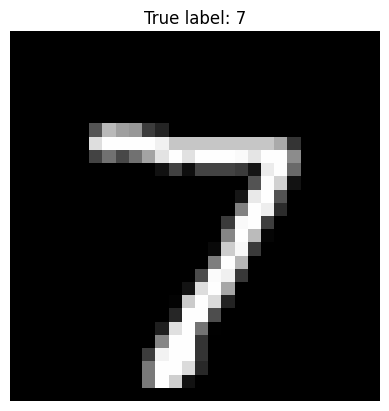

In [3]:
# exp14_two_layer_ann_correct.py
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Normalize
X_train = X_train / 255.0
X_test  = X_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

# 3. Build TWO-hidden-layer ANN
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),   # Hidden Layer 1
    Dense(64, activation='relu'),    # Hidden Layer 2
    Dense(10, activation='softmax')  # Output Layer
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train
model.fit(X_train, y_train_cat, epochs=5, batch_size=128, verbose=2)

# 5. Evaluate
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

# 6. Optional — show one test sample
plt.imshow(X_test[0], cmap='gray')
plt.title(f"True label: {y_test[0]}")
plt.axis('off')
plt.show()
